In [ ]:
#analyze file
#grabbed torvik data from 2016-24 (no 20 / covid)
#looking for correlations in column fields that would predict the elite 8 flag

In [2]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from IPython.display import display

In [3]:
df_torvik = pd.read_csv('data/barttorvik_analyze_L1.csv')

display(df_torvik.head(5))
display(df_torvik.info())


,Unnamed: 0,Team,Elite 8,Final 4,Seed,Win,AdjOE,AdjOD,AdjDE,Barthag,...,Conf_SB,Conf_SC,Conf_SEC,Conf_SWAC,Conf_Slnd,Conf_Sum,Conf_WAC,Conf_WCC,bluePower_Barthag,bluePower_Seed
0,0,Louisville,0,0,2.639057,3.401197,4.789157,1,4.490881,0.677881,...,0,0,0,0,0,0,0,0,1.214600,4.728556
1,2,Arizona,1,0,2.833213,3.433987,4.753590,0,4.473922,0.674168,...,0,0,0,0,0,0,0,0,1.481299,6.225206
2,4,Florida,1,1,2.833213,3.496508,4.761319,0,4.497585,0.670646,...,0,0,1,0,0,0,0,0,1.473560,6.225206
3,6,Duke,0,0,2.708050,3.295837,4.844974,0,4.593098,0.667214,...,0,0,0,0,0,0,0,0,1.466019,5.950194
4,8,Virginia,0,0,2.833213,3.367296,4.737951,0,4.493121,0.665416,...,0,0,0,0,0,0,0,0,1.462069,6.225206


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         748 non-null    int64  
 1   Team               748 non-null    object 
 2   Elite 8            748 non-null    int64  
 3   Final 4            748 non-null    int64  
 4   Seed               748 non-null    float64
 5   Win                748 non-null    float64
 6   AdjOE              748 non-null    float64
 7   AdjOD              748 non-null    int64  
 8   AdjDE              748 non-null    float64
 9   Barthag            748 non-null    float64
 10  EFG%               748 non-null    float64
 11  EFGD%              748 non-null    float64
 12  TOR                748 non-null    float64
 13  TORD               748 non-null    float64
 14  ORB                748 non-null    float64
 15  DRB                748 non-null    float64
 16  FTR                748 non

None

In [4]:
#drop the unnamed column

df_torvik = df_torvik.drop(columns=["Unnamed: 0"])

# Keep "Team" for final output (but exclude from model features)
df_new_team = df_torvik[["Team"]].copy()  # Keep Team name safe

df_torvik = df_torvik.drop(columns=["Team"])

#Conf drop
df_torvik = df_torvik.drop(columns=["Conf_P12"])

display(df_torvik.head(5))

,Elite 8,Final 4,Seed,Win,AdjOE,AdjOD,AdjDE,Barthag,EFG%,EFGD%,...,Conf_SB,Conf_SC,Conf_SEC,Conf_SWAC,Conf_Slnd,Conf_Sum,Conf_WAC,Conf_WCC,bluePower_Barthag,bluePower_Seed
0,0,0,2.639057,3.401197,4.789157,1,4.490881,0.677881,4.007333,3.802208,...,0,0,0,0,0,0,0,0,1.214600,4.728556
1,1,0,2.833213,3.433987,4.753590,0,4.473922,0.674168,3.962716,3.765840,...,0,0,0,0,0,0,0,0,1.481299,6.225206
2,1,1,2.833213,3.496508,4.761319,0,4.497585,0.670646,3.983413,3.830813,...,0,0,1,0,0,0,0,0,1.473560,6.225206
3,0,0,2.708050,3.295837,4.844974,0,4.593098,0.667214,4.007333,3.912023,...,0,0,0,0,0,0,0,0,1.466019,5.950194
4,0,0,2.833213,3.367296,4.737951,0,4.493121,0.665416,3.943522,3.804438,...,0,0,0,0,0,0,0,0,1.462069,6.225206


In [5]:
label_keep='Elite 8'
label_drop='Final 4'
#label_keep='Final 4'
#label_drop='Elite 8'


df_torvik = df_torvik.drop(columns=[label_drop])

In [6]:
#analysis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and label
features = df_torvik.drop([label_keep], axis=1)
label = df_torvik[label_keep]

# Train a temporary RF model to get feature importance
temp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
temp_rf.fit(features, label)

# Calculate feature importance
importances = temp_rf.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by="Importance", ascending=False)

# Display importance for all features
print("Feature Importance for All Features:")
display(importance_df)

# Calculate the 50th percentile of feature importance
importance_threshold = importance_df['Importance'].quantile(0.50)

# Identify features that are below the percentile (bottom quartile)
low_importance_features = importance_df[importance_df['Importance'] < importance_threshold]['Feature'].tolist()

# Remove them from the dataset
features = features.drop(columns=low_importance_features, errors='ignore')

# Output the results
print(f"Removed {len(low_importance_features)} features in the bottom quartile of importance.")
print("Dropped Features:", low_importance_features)

Feature Importance for All Features:


,Feature,Importance
5,Barthag,9.427030e-02
53,bluePower_Barthag,8.947425e-02
54,bluePower_Seed,6.335765e-02
2,AdjOE,6.333373e-02
0,Seed,5.547559e-02
4,AdjDE,4.389923e-02
14,2P%,3.960208e-02
6,EFG%,3.857716e-02
11,DRB,3.715938e-02
7,EFGD%,3.700786e-02


Removed 27 features in the bottom quartile of importance.
Dropped Features: ['Conf_CUSA', 'Conf_B10', 'Conf_A10', 'Conf_MAAC', 'Conf_MVC', 'Conf_WCC', 'Conf_Amer', 'Conf_MWC', 'Conf_WAC', 'Conf_Slnd', 'Conf_MEAC', 'Conf_BSth', 'Conf_NEC', 'Conf_SC', 'Conf_MAC', 'Conf_Ivy', 'Conf_OVC', 'Conf_Pat', 'Conf_SB', 'Conf_AE', 'Conf_SWAC', 'Conf_Horz', 'Conf_Sum', 'Conf_ASun', 'Conf_CAA', 'Conf_BW', 'Conf_BSky']


In [7]:
# Convert label to integer (if not already)
label = label.astype(int)

# Remove low-importance features BEFORE scaling
features = features.drop(columns=low_importance_features, errors='ignore')

# Optional: Standardize features (especially for KNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Ensure features_scaled is a DataFrame (preserve column names)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Perform train-test split with optimized feature set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, label, test_size=0.2, random_state=42)

# Retain index from the original DataFrame
X_train.index = features.index[:len(X_train)]
X_test.index = features.index[len(X_train):]

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (598, 28), Test set size: (150, 28)


In [8]:
#We will train both Random Forest and K-Nearest Neighbors.

#RF

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for optimization (add more hyperparameters)
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],  # Add max_features for testing
    'bootstrap': [True, False],  # Test with and without bootstrap sampling
}

# Use Stratified KFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=cv,  # Use Stratified KFold
    scoring='f1_macro',
    n_jobs=-1
)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters from Grid Search
best_rf_params = grid_search.best_params_.copy()

# Print the best parameters found
print("🔍 Best Parameters from Grid Search:", best_rf_params)

# Safely update parameters as needed
best_rf_params.update({
    'class_weight': 'balanced_subsample',  
    'min_samples_leaf': max(best_rf_params.get('min_samples_leaf', 1), 2),
    'min_samples_split': max(best_rf_params.get('min_samples_split', 2), 10)
})

# Train the final optimized Random Forest model
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='f1_macro')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean()}")

print("✅ Final Random Forest model training complete!")

🔍 Best Parameters from Grid Search: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400}
Cross-validation F1 scores: [0.77162934 0.74505638 0.73333333 0.63059867 0.84356808]
Mean F1 score: 0.7448371593364436
✅ Final Random Forest model training complete!


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# ---------------------
# After loading or splitting your data into X_train, X_test, y_train, and y_test:
# ---------------------

# If X_train and X_test are DataFrames, you can use pandas to check for NaN values.
print("Missing values per column in X_train:")
print(X_train.isna().sum())

print("\nRows in X_train that contain at least one missing value:")
print(X_train[X_train.isna().any(axis=1)])

print("\nMissing values per column in X_test:")
print(X_test.isna().sum())

print("\nRows in X_test that contain at least one missing value:")
print(X_test[X_test.isna().any(axis=1)])

# Alternatively, if your data is in NumPy array format, you could do:
#print("Indices of NaN values in X_train:")
#print(np.where(np.isnan(X_train)))
#print("Indices of NaN values in X_test:")
#print(np.where(np.isnan(X_test)))

# ---------------------
# After inspecting NaNs, you can decide whether to drop or impute them before model training.
# Then continue with your grid search and model training:
# ---------------------

Missing values per column in X_train:
Seed                 0
Win                  0
AdjOE                0
AdjOD                0
AdjDE                0
Barthag              0
EFG%                 0
EFGD%                0
TOR                  0
TORD                 0
ORB                  0
DRB                  0
FTR                  0
FTRD                 0
2P%                  0
2P%D                 0
3P%                  0
3P%D                 0
3PR                  0
3PRD                 0
Adj T.               0
bluePower            0
Conf_ACC             0
Conf_B12             0
Conf_BE              0
Conf_SEC             0
bluePower_Barthag    0
bluePower_Seed       0
dtype: int64

Rows in X_train that contain at least one missing value:
Empty DataFrame
Columns: [Seed, Win, AdjOE, AdjOD, AdjDE, Barthag, EFG%, EFGD%, TOR, TORD, ORB, DRB, FTR, FTRD, 2P%, 2P%D, 3P%, 3P%D, 3PR, 3PRD, Adj T., bluePower, Conf_ACC, Conf_B12, Conf_BE, Conf_SEC, bluePower_Barthag, bluePower_Seed]
Index: []

In [10]:

# Define parameter grid for KNN tuning

knn_param_grid = {
    'n_neighbors': [7, 9, 11],  # Remove 3 and 5 to improve stability
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search with cross-validation
knn_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',  # Optimize for balanced performance
    n_jobs=-1  # Use all available cores for faster computation
)

knn_grid_search.fit(X_train, y_train)

# Get best parameters
best_knn_params = knn_grid_search.best_params_

# Train the best KNN model found
knn_model = KNeighborsClassifier(**best_knn_params)
knn_model.fit(X_train, y_train)

# Make predictions with optimized KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate optimized KNN
print("✅ Grid Search completed. Best KNN Parameters:", best_knn_params)
print("📊 Optimized KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

✅ Grid Search completed. Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
📊 Optimized KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       132
           1       0.86      0.33      0.48        18

    accuracy                           0.91       150
   macro avg       0.89      0.66      0.72       150
weighted avg       0.91      0.91      0.90       150



In [11]:
!pip install xgboost

In [12]:
# ✅ Train XGBoost Model
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search to optimize XGBoost
xgb_grid_search = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    xgb_param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

xgb_grid_search.fit(X_train, y_train)

# Get the best XGBoost parameters
best_xgb_params = xgb_grid_search.best_params_
print("🔍 Best XGBoost Parameters:", best_xgb_params)

# Train the final XGBoost model with optimized parameters
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

print("✅ XGBoost Training Complete!")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

🔍 Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
✅ XGBoost Training Complete!


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:13:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
# Reattach the "Team" column to the results
df_torvik["Team"] = df_new_team["Team"]

In [14]:
rf_threshold = 0.61
knn_threshold = 0.61
xgb_threshold = 0.58


# 🏀 Random Forest Prediction with Probability Threshold
rf_probs = rf_model.predict_proba(features_scaled)[:, 1]  # Probability of being Elite 8
df_torvik["RF_Prob"] = rf_probs  # ✅ Store actual probability values
df_torvik["predict_E8_RF"] = (rf_probs >= rf_threshold).astype(int)  # Apply threshold

# 🏀 KNN Prediction with Probability Threshold
knn_probs = knn_model.predict_proba(features_scaled)[:, 1]  # Probability of being Elite 8
df_torvik["KNN_Prob"] = knn_probs  # ✅ Store actual probability values
df_torvik["predict_E8_KNN"] = (knn_probs >= knn_threshold).astype(int)  # Apply threshold

# ✅ Adjusted XGBoost Prediction Threshold (Lowered to Improve Recall)
xgb_probs = xgb_model.predict_proba(features_scaled)[:, 1]  # Probability of being Elite 8
df_torvik["XGB_Prob"] = xgb_probs  # ✅ Store actual probability values
df_torvik["predict_E8_XGB"] = (xgb_probs >= xgb_threshold).astype(int)  # Apply threshold

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate how well the models perform, check their accuracy against the test set:

y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)  # ✅ Add XGBoost Predictions

# Print accuracy for all models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))  # ✅ Add XGBoost Accuracy

# Print classification reports for all models
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))  # ✅ Add XGBoost Report

Random Forest Accuracy: 0.88
KNN Accuracy: 0.9133333333333333
XGBoost Accuracy: 0.9066666666666666

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.50      0.56      0.53        18

    accuracy                           0.88       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.89      0.88      0.88       150


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       132
           1       0.86      0.33      0.48        18

    accuracy                           0.91       150
   macro avg       0.89      0.66      0.72       150
weighted avg       0.91      0.91      0.90       150


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       132
           1       0.70      0.39    

Random Forest Confusion Matrix:
 [[642  18]
 [  9  79]]
KNN Confusion Matrix:
 [[660   0]
 [ 15  73]]
XGBoost Confusion Matrix:
 [[657   3]
 [ 49  39]]


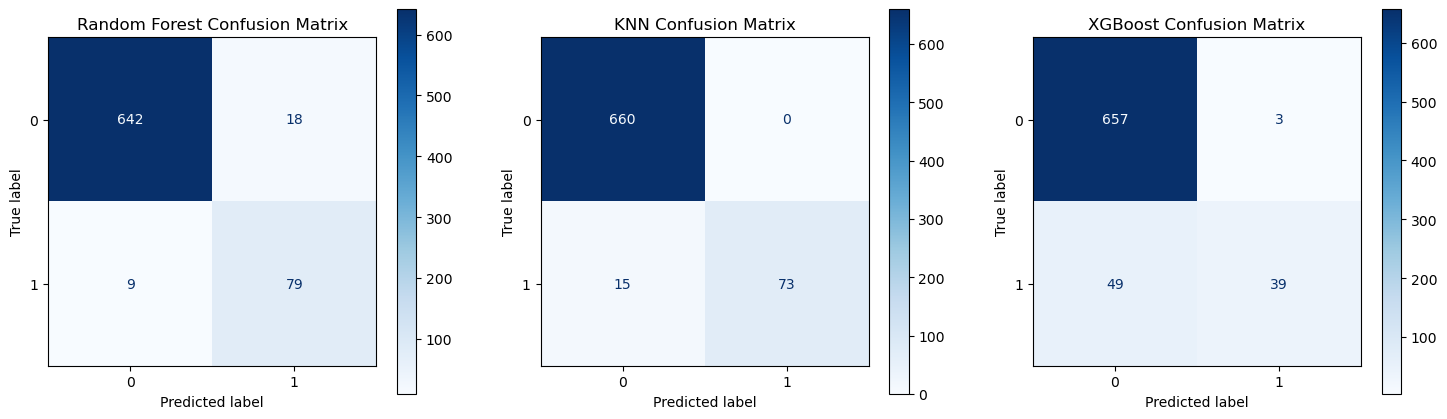

In [16]:
# 📊 Confusion Matrix for RF, KNN, and XGBoost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Convert XGBoost probabilities into binary predictions using the same threshold
xgb_binary_predictions = (df_torvik["predict_E8_XGB"] >= 0.61).astype(int)  # Add XGBoost Threshold

# 📍 Random Forest Confusion Matrix
rf_binary_predictions = (df_torvik["predict_E8_RF"] >= 0.61).astype(int)
rf_cm = confusion_matrix(df_torvik[label_keep], rf_binary_predictions)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=[0, 1])
print("Random Forest Confusion Matrix:\n", rf_cm)

# 📍 KNN Confusion Matrix
knn_binary_predictions = (df_torvik["predict_E8_KNN"] >= 0.61).astype(int)
knn_cm = confusion_matrix(df_torvik[label_keep], knn_binary_predictions)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=[0, 1])
print("KNN Confusion Matrix:\n", knn_cm)

# 📍 XGBoost Confusion Matrix
xgb_cm = confusion_matrix(df_torvik[label_keep], xgb_binary_predictions)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=[0, 1])
print("XGBoost Confusion Matrix:\n", xgb_cm)

# 🎨 Plot all three matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].set_title("Random Forest Confusion Matrix")
rf_disp.plot(ax=axes[0], cmap="Blues")

axes[1].set_title("KNN Confusion Matrix")
knn_disp.plot(ax=axes[1], cmap="Blues")

axes[2].set_title("XGBoost Confusion Matrix")
xgb_disp.plot(ax=axes[2], cmap="Blues")

plt.show()

In [17]:
# Identify false positive teams (Predicted Elite 8 but actually were not)
false_positive_teams = df_torvik[
    (rf_probs >= rf_threshold)  # Use actual probability scores instead of binary predictions
    & (df_torvik[label_keep] == 0)  # But they actually were not
]

# Sort false positives by confidence (highest probability first)
false_positive_teams = false_positive_teams[["Team", "predict_E8_RF",label_keep, "RF_Prob"]].sort_values(by="RF_Prob", ascending=False)

# Display the false positive teams along with their probabilities
print(f"🚨 False Positive Teams ({len(false_positive_teams)} predicted Elite 8 but actually not):")
display(false_positive_teams)

🚨 False Positive Teams (18 predicted Elite 8 but actually not):


,Team,predict_E8_RF,Elite 8,RF_Prob
73,Villanova,1,0,0.857867
550,Arizona,1,0,0.833500
617,Iowa St.,1,0,0.800785
212,Duke,1,0,0.798084
205,Villanova,1,0,0.765858
7,Kansas,1,0,0.723865
417,Ohio St.,1,0,0.723644
691,Wisconsin,1,0,0.718454
615,Auburn,1,0,0.706681
616,Arizona,1,0,0.706336


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


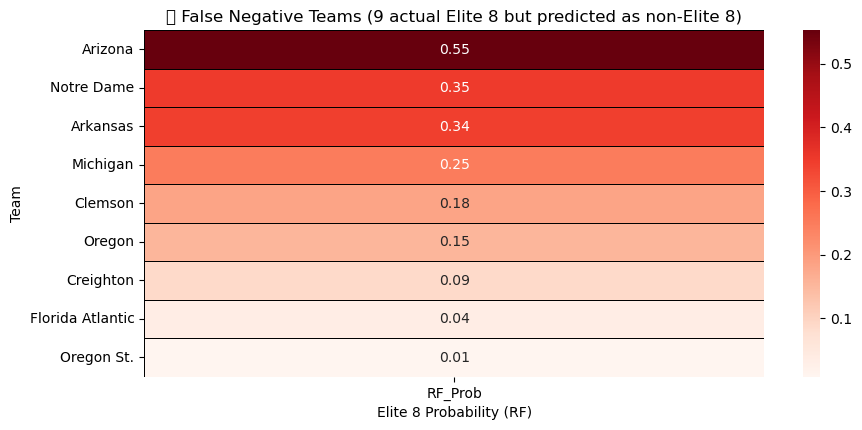

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify false negative teams (Actual Elite 8, but model predicted NOT Elite 8)
false_negative_teams = df_torvik[
    (df_torvik[label_keep] == 1)  # These teams were actually Elite 8
    & (df_torvik["RF_Prob"] < rf_threshold)  # But the model predicted them as NOT Elite 8
]

# Check if we have false negatives before displaying
if false_negative_teams.empty:
    print("✅ No false negatives found!")
else:
    # Sort by probability for better visualization
    false_negative_teams = false_negative_teams.sort_values(by="RF_Prob", ascending=False)

    # Set up the figure
    plt.figure(figsize=(10, len(false_negative_teams) * 0.5))  # Adjust height based on number of teams

    # Create a heatmap of probabilities
    sns.heatmap(
        false_negative_teams[["RF_Prob"]],
        annot=True, fmt=".2f", cmap="Reds",
        linewidths=0.5, linecolor="black",
        cbar=True
    )

    # Formatting
    plt.yticks(ticks=np.arange(len(false_negative_teams)) + 0.5, labels=false_negative_teams["Team"], rotation=0)
    plt.xlabel("Elite 8 Probability (RF)")
    plt.ylabel("Team")
    plt.title(f"🚨 False Negative Teams ({len(false_negative_teams)} actual Elite 8 but predicted as non-Elite 8)")

    # Show the heatmap
    plt.show()

In [19]:
# Convert to csv

df_torvik.to_csv("../L2/data/barttorvik_analyze_L2.csv")

In [20]:
######## Predictions

# Load new data for prediction
df_new_torvik = pd.read_csv("data/barttorvik_predict_L1.csv")

display(df_new_torvik.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         68 non-null     int64  
 1   Team               68 non-null     object 
 2   Seed               68 non-null     float64
 3   Win                68 non-null     float64
 4   AdjOE              68 non-null     float64
 5   AdjDE              68 non-null     float64
 6   Barthag            68 non-null     float64
 7   AdjOD              68 non-null     int64  
 8   EFG%               68 non-null     float64
 9   EFGD%              68 non-null     float64
 10  TOR                68 non-null     float64
 11  TORD               68 non-null     float64
 12  ORB                68 non-null     float64
 13  DRB                68 non-null     float64
 14  FTR                68 non-null     float64
 15  FTRD               68 non-null     float64
 16  2P%                68 non-nu

None

In [21]:

df_new_torvik = df_new_torvik.drop(columns=["Unnamed: 0"])

# Keep "Team" for final output (but exclude from model features)
df_new_team = df_new_torvik[["Team"]].copy()  # Keep Team name safe

df_new_torvik = df_new_torvik.drop(columns=["Team"])

df_new_torvik = df_new_torvik.drop(columns=["Conf_P12"])

In [22]:
# Validate that the feature names and order match between training and new data
train_feature_names = list(features_scaled.columns)  # Get feature names from training
predict_feature_names = list(df_new_torvik.columns)  # Get feature names from new dataset

if train_feature_names != predict_feature_names:
    print("🚨 Feature Mismatch Detected! Fixing feature order...")
    
    # Reorder the new features to match training order
    df_new_torvik = df_new_torvik[train_feature_names]
else:
    print("✅ Feature names and order match!")

🚨 Feature Mismatch Detected! Fixing feature order...


In [23]:

# Drop columns that were removed during training
df_new_torvik = df_new_torvik.drop(columns=low_importance_features, errors='ignore')

# Standardize features (same scaling as training)
features_new_scaled = scaler.transform(df_new_torvik)  # Use same scaler as before

# Ensure DataFrame format
features_new_scaled = pd.DataFrame(features_new_scaled, columns=df_new_torvik.columns)

In [24]:
# Predict using Random Forest and K-Nearest Neighbors with probability thresholds

# 🏀 Random Forest Prediction with Probability Threshold
rf_probs = rf_model.predict_proba(features_new_scaled)[:, 1]  # Probability of being Elite 8
rf_threshold = 0.61  # Adjust threshold as needed
df_new_torvik["predict_E8_RF"] = (rf_probs >= rf_threshold).astype(int)

# 🏀 KNN Prediction Probabilities
knn_probs = knn_model.predict_proba(features_new_scaled)[:, 1]  # Probability of being Elite 8
knn_threshold = 0.40  # Adjust threshold as needed
df_new_torvik["predict_E8_KNN"] = (knn_probs >= knn_threshold).astype(int)

# 🏀 XGBoost Prediction with Probability Threshold
xgb_probs = xgb_model.predict_proba(features_new_scaled)[:, 1]  # Probability of being Elite 8
xgb_threshold = 0.58  # Adjust threshold as needed
df_new_torvik["predict_E8_XGB"] = (xgb_probs >= xgb_threshold).astype(int)

# Store probabilities for sorting
df_new_torvik["RF_Prob"] = rf_probs
df_new_torvik["KNN_Prob"] = knn_probs
df_new_torvik["XGB_Prob"] = xgb_probs  # ✅ Store XGBoost probabilities

# Reattach the "Team" column to the results
df_new_torvik["Team"] = df_new_team["Team"]

# Reorder columns for better readability
df_new_torvik = df_new_torvik[["Team", "RF_Prob", "predict_E8_RF", "KNN_Prob", "predict_E8_KNN", "XGB_Prob", "predict_E8_XGB"]]

# Sort by XGBoost probability (highest Elite 8 likelihood first)
df_new_torvik = df_new_torvik.sort_values(by="XGB_Prob", ascending=False)  # ✅ Change sorting to XGBoost

# Display final predictions with team names
print(f"🏀 New RF Elite 8 Predictions: {df_new_torvik['predict_E8_RF'].sum()} teams flagged")
print(f"🏀 New KNN Elite 8 Predictions: {df_new_torvik['predict_E8_KNN'].sum()} teams flagged")
print(f"🏀 New XGB Elite 8 Predictions: {df_new_torvik['predict_E8_XGB'].sum()} teams flagged")
print("✅ Predictions with Team Names (Sorted by XGB Probability):")
display(df_new_torvik.head(25))


🏀 New RF Elite 8 Predictions: 9 teams flagged
🏀 New KNN Elite 8 Predictions: 9 teams flagged
🏀 New XGB Elite 8 Predictions: 7 teams flagged
✅ Predictions with Team Names (Sorted by XGB Probability):


,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB
6,Texas Tech,0.965608,1,1.000000,1,0.873618,1
1,Duke,0.973436,1,1.000000,1,0.870313,1
3,Florida,0.942231,1,0.587274,1,0.865396,1
2,Auburn,0.965279,1,1.000000,1,0.842549,1
4,Alabama,0.949181,1,1.000000,1,0.805204,1
5,Tennessee,0.946750,1,1.000000,1,0.779798,1
0,Houston,0.917820,1,1.000000,1,0.744037,1
8,Arizona,0.872080,1,1.000000,1,0.556495,0
11,Wisconsin,0.718454,1,0.142220,0,0.385853,0
9,Maryland,0.570109,0,0.000000,0,0.343059,0


In [25]:
# Filter teams predicted to reach the Elite 8 by RF
elite_8_rf_teams = df_new_torvik[df_new_torvik["predict_E8_RF"] == 1]

# Filter teams predicted to reach the Elite 8 by KNN
elite_8_knn_teams = df_new_torvik[df_new_torvik["predict_E8_KNN"] == 1]

# Filter teams predicted to reach the Elite 8 by XGBoost
elite_8_xgb_teams = df_new_torvik[df_new_torvik["predict_E8_XGB"] == 1]  # ✅ Added XGBoost filter

# Sort Elite 8 teams by probability (high to low)
elite_8_rf_teams = elite_8_rf_teams.sort_values(by="RF_Prob", ascending=False)
elite_8_knn_teams = elite_8_knn_teams.sort_values(by="KNN_Prob", ascending=False)
elite_8_xgb_teams = elite_8_xgb_teams.sort_values(by="XGB_Prob", ascending=False)  # ✅ Sort XGBoost results

# Display sorted results
print(f"🏀 Elite 8 Teams Predicted by RF ({len(elite_8_rf_teams)} teams):")
display(elite_8_rf_teams)

print(f"🏀 Elite 8 Teams Predicted by KNN ({len(elite_8_knn_teams)} teams):")
display(elite_8_knn_teams)

print(f"🏀 Elite 8 Teams Predicted by XGBoost ({len(elite_8_xgb_teams)} teams):")
display(elite_8_xgb_teams)  # ✅ Added XGBoost results

🏀 Elite 8 Teams Predicted by RF (9 teams):


,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB
1,Duke,0.973436,1,1.000000,1,0.870313,1
6,Texas Tech,0.965608,1,1.000000,1,0.873618,1
2,Auburn,0.965279,1,1.000000,1,0.842549,1
4,Alabama,0.949181,1,1.000000,1,0.805204,1
5,Tennessee,0.946750,1,1.000000,1,0.779798,1
3,Florida,0.942231,1,0.587274,1,0.865396,1
0,Houston,0.917820,1,1.000000,1,0.744037,1
8,Arizona,0.872080,1,1.000000,1,0.556495,0
11,Wisconsin,0.718454,1,0.142220,0,0.385853,0


🏀 Elite 8 Teams Predicted by KNN (9 teams):


,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB
6,Texas Tech,0.965608,1,1.000000,1,0.873618,1
1,Duke,0.973436,1,1.000000,1,0.870313,1
2,Auburn,0.965279,1,1.000000,1,0.842549,1
4,Alabama,0.949181,1,1.000000,1,0.805204,1
5,Tennessee,0.946750,1,1.000000,1,0.779798,1
0,Houston,0.917820,1,1.000000,1,0.744037,1
8,Arizona,0.872080,1,1.000000,1,0.556495,0
3,Florida,0.942231,1,0.587274,1,0.865396,1
34,North Carolina,0.377015,0,0.442003,1,0.153340,0


🏀 Elite 8 Teams Predicted by XGBoost (7 teams):


,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB
6,Texas Tech,0.965608,1,1.000000,1,0.873618,1
1,Duke,0.973436,1,1.000000,1,0.870313,1
3,Florida,0.942231,1,0.587274,1,0.865396,1
2,Auburn,0.965279,1,1.000000,1,0.842549,1
4,Alabama,0.949181,1,1.000000,1,0.805204,1
5,Tennessee,0.946750,1,1.000000,1,0.779798,1
0,Houston,0.917820,1,1.000000,1,0.744037,1


In [26]:
# Convert to csv

df_new_torvik.to_csv("../L2/data/barttorvik_predict2025_L2.csv")